# Teorema Central do Limite

Na inferência estatística a utilidade do teorema central do limite vai desde estimar os parâmetros como a média populacional ou o desvio padrão da média populacional, a partir de uma amostra aleatória dessa população, ou seja, da média amostral e do desvio padrão da média amostral até calcular a probabilidade de um parâmetro ocorrer dado um intervalo, sua média amostral e o desvio padrão da média amostral. 

Vamos testá-lo:

In [72]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt 
x=sp.random.poisson(lam=1, size=100) 
a = 5 
n = 1000 

populacao1 = np.random.power(a, n) 

In [105]:
n_amostras = 10000
amostra_tamanho = 30
medias = []
desvio_padrao = []

def teorema_central_limite(n_amostras,amostra_tamanho,populacao_original, plot=False):
    
      
    for i in range(n_amostras):
        
        np.random.shuffle(populacao_original)

        medias.append(np.mean(populacao_original[:amostra_tamanho]))

        desvio_padrao.append(np.std(populacao_original[:amostra_tamanho]))
        

    if plot==True:
        fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
        ax1.hist(populacao_original,bins=100)
        ax1.grid()
        ax1.set_title(f'Distribuição da População Original')
        ax2.hist(medias,bins=100)
        ax2.grid()
        ax2.set_title(f'Distribuição das Médias das {n_amostras} Amostras de tamanho {amostra_tamanho}')
        print(f'Média da População Original: {np.mean(populacao_original)} +/- Desvio Padrão: {np.std(populacao_original)}')
        print(f'Média das {n_amostras} Amostras de tamanho {amostra_tamanho}: {np.mean(medias)} +/- Desvio Padrão: {np.mean(desvio_padrao)}')
    
    
    else: 
        
        return np.mean(medias),np.mean(desvio_padrao)

    

# População 1

Média da População Original: 0.8327001731549704 +/- Desvio Padrão: 0.14104125648364643
Média das 10000 Amostras de tamanho 5: 0.832835588268159 +/- Desvio Padrão: 0.11590749338747841


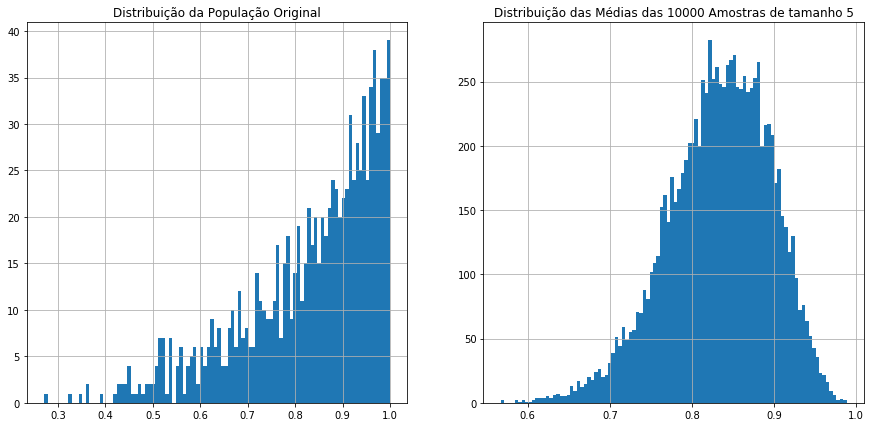

In [96]:
teorema_central_limite(n_amostras,5,populacao1, plot=True)

Média da População Original: 0.8327001731549704 +/- Desvio Padrão: 0.14104125648364643
Média das 10000 Amostras de tamanho 10: 0.8328020386730732 +/- Desvio Padrão: 0.12251398732608353


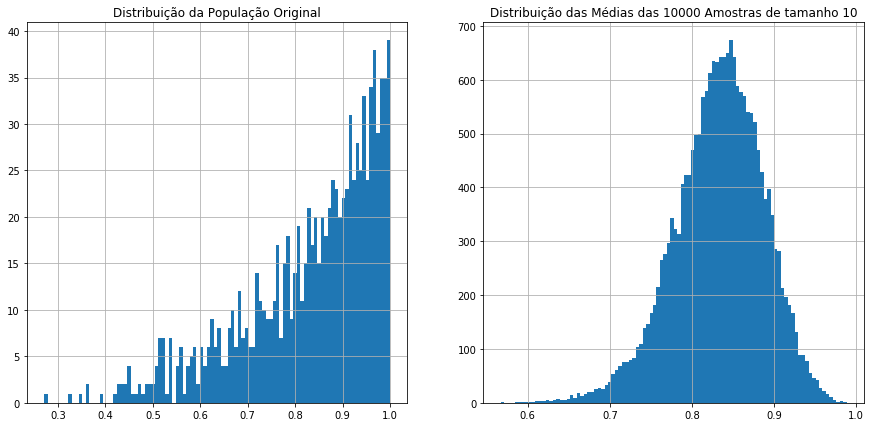

In [97]:
teorema_central_limite(n_amostras,10,populacao1,plot=True)

Média da População Original: 0.8327001731549704 +/- Desvio Padrão: 0.14104125648364643
Média das 10000 Amostras de tamanho 20: 0.8327762606171496 +/- Desvio Padrão: 0.12670980748172536


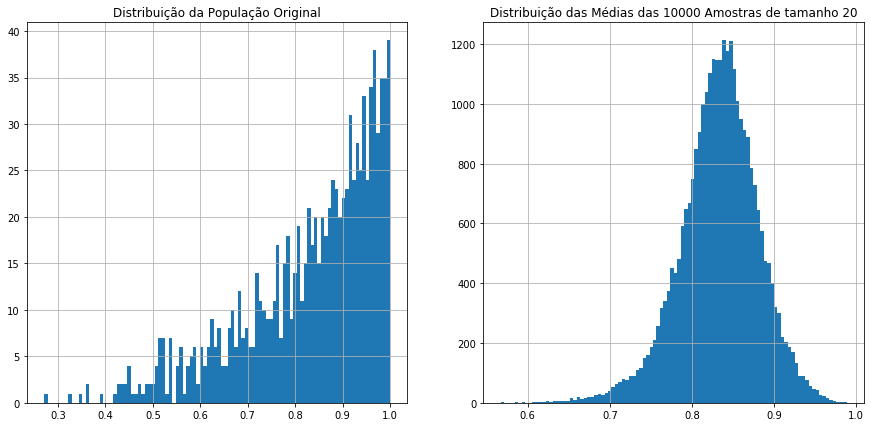

In [98]:
teorema_central_limite(n_amostras,20,populacao1,plot=True)

Média da População Original: 0.8327001731549704 +/- Desvio Padrão: 0.14104125648364643
Média das 10000 Amostras de tamanho 50: 0.8327031155449236 +/- Desvio Padrão: 0.12980673783244842


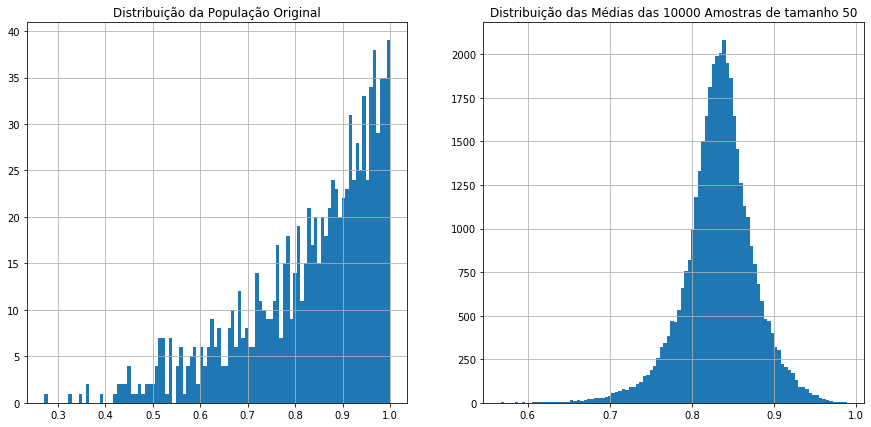

In [99]:
teorema_central_limite(n_amostras,50,populacao1,plot=True)

Podemos observar que conforme o tamanho das amostras vai aumentando, a distribuição das médias das amostras tende a uma distribuição normal cuja média está próxima da média da população original, bem como o desvio padrão. Veja o gráfico abaixo que demonstra este fato:

In [112]:
average = []

std = []

for tamanho in range(1,100):
        
        u,sigma = teorema_central_limite(n_amostras,tamanho,populacao1,plot=False)
        average.append(u)
        std.append(sigma)    

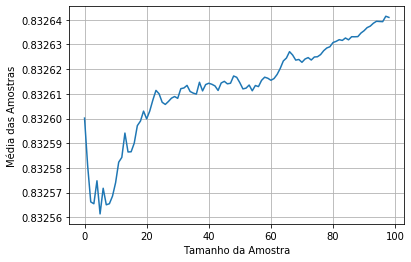

In [113]:
plt.plot(average)
plt.xlabel('Tamanho da Amostra')
plt.ylabel('Média das Amostras')
plt.grid()

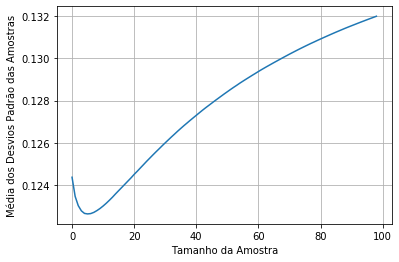

In [114]:
plt.plot(std)
plt.xlabel('Tamanho da Amostra')
plt.ylabel('Média dos Desvios Padrão das Amostras')
plt.grid()

Conforme aumenta-se o tamanho da amostra os valores da média e do desvio padrão vão se aproximando aos valores da população original.